Phân tích Khám phá Dữ liệu (EDA) trên tập dữ liệu Titanic

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Tải dữ liệu từ một nguồn trực tuyến (đây là cách làm phổ biến)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

In [4]:
# Hiển thị 5 dòng đầu tiên để có cái nhìn tổng quan
print("5 dòng dữ liệu đầu tiên:")
print(df.head())

5 dòng dữ liệu đầu tiên:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

In [ ]:
# Xem thông tin tổng quan về các cột, kiểu dữ liệu và giá trị non-null
print("\nThông tin chung về DataFrame:")
df.info()


Thông tin chung về DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Xem thống kê mô tả cho các cột số (mean, std, min, max...)
print("\nThống kê mô tả:")
print(df.describe())


Thống kê mô tả:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Tỉ lệ sống sót chung là bao nhiêu

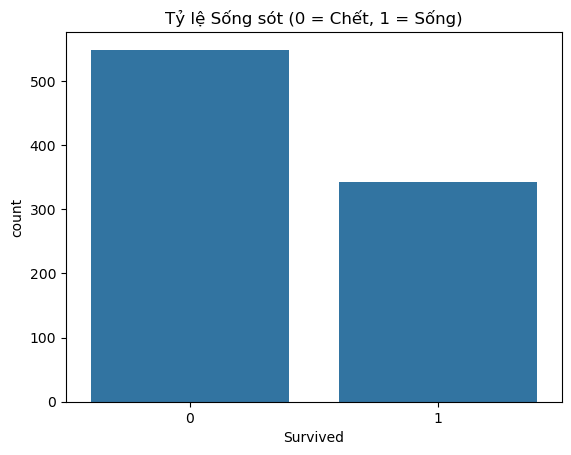


Tỷ lệ sống sót: 38.38%
Tỷ lệ tử vong: 61.62%


In [7]:
# Sử dụng countplot của seaborn để đếm số lượng sống/chết
sns.countplot(x='Survived', data=df)
plt.title('Tỷ lệ Sống sót (0 = Chết, 1 = Sống)')
plt.show()

# Tính tỷ lệ phần trăm
survival_rate = df['Survived'].value_counts(normalize=True) * 100
print(f"\nTỷ lệ sống sót: {survival_rate[1]:.2f}%")
print(f"Tỷ lệ tử vong: {survival_rate[0]:.2f}%")

Liệu giới tính có ảnh hưởng đến khả năng sống sót?

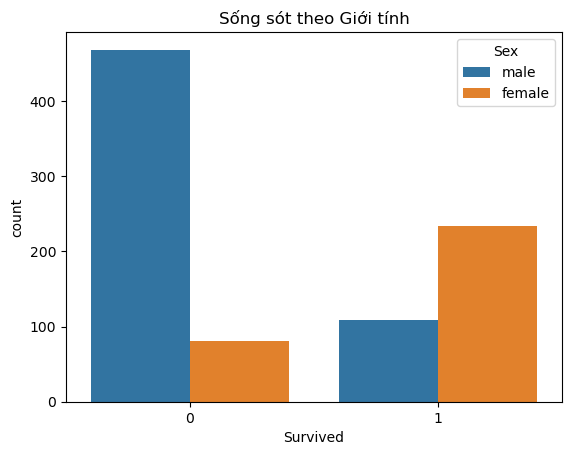

In [8]:
# So sánh tỷ lệ sống sót giữa nam và nữ
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Sống sót theo Giới tính')
plt.show()

Tầng lớp xã hội (Pclass) có vai trò gì?

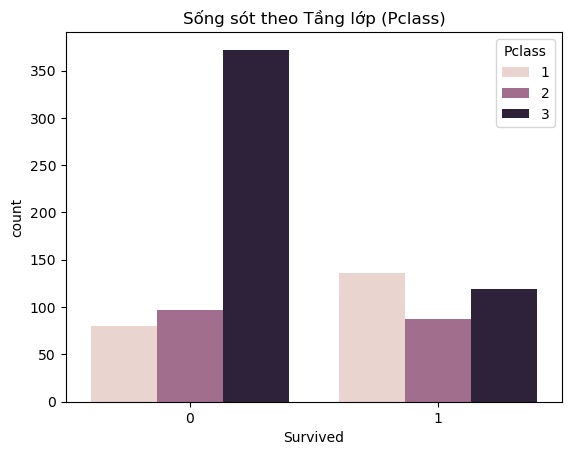

In [9]:
# So sánh tỷ lệ sống sót giữa các tầng lớp
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Sống sót theo Tầng lớp (Pclass)')
plt.show()

Độ tuổi ảnh hưởng như thế nào?

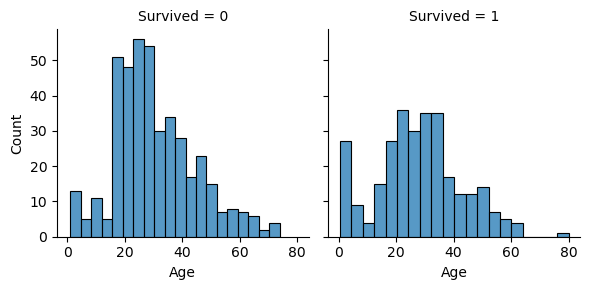

In [10]:
# Sử dụng biểu đồ histogram để xem phân bố tuổi của người sống và chết
g = sns.FacetGrid(df, col='Survived')
g.map(sns.histplot, 'Age', bins=20)
plt.show()